In [8]:
import pandas as pd
import numpy as np
# This pulls the data
url = 'https://github.com/KritiM7/SMS-Spam-Detection/raw/refs/heads/main/spam.csv'
df = pd.read_csv(url, encoding='latin-1')

print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
!pip freeze > requirements.txt

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

  label                                               text  label_enc
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


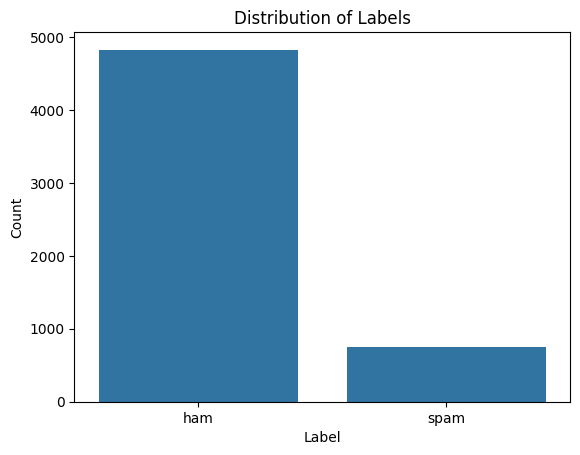

In [ ]:
# Visualizing label distribution for better understanding of data relationship

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['label'])

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
# Average number of tokens in all sentences
avg_words_len = round(sum([len(text.split()) for text in df['text']]) / len(df['text']))
print("Average number of words per sentence:", avg_words_len)
# Total number of unique words in corpus
unique_words = set()
for text in df['text']:
    for word in text.split():
        unique_words.add(word)
total_words_length = len(unique_words)
print("Total number of unique words in corpus:", total_words_length)

Average number of words per sentence: 15
Total number of unique words in corpus: 15585


In [ ]:
# Calculation 1: Average number of tokens (words) per sentence
token_counts = map(lambda sentence: len(sentence.split()), df['text'])    # len(sentence.split()) counts tokens separated by whitespace
total_tokens = sum(token_counts) # Sum the token counts to get the total number of words in the entire corpus.
corpus_size = len(df['text'])

# Calculating the average and rounding
mean_token_count = total_tokens / corpus_size
avg_words_per_sentence = round(mean_token_count)  # round() function to round the average to the nearest integer

print("Average number of words per sentence:", avg_words_per_sentence)

Average number of words per sentence: 15


In [ ]:
# Calculation 2: Total number of unique words in the corpus

unique_word_pool = set()  # initialize an empty set to store unique words because set dt automatically handles duplication
for text_string in df['text']:         # Split the sentence into words (tokens) and use .update() to add all new words to the unique_word_pool set

    unique_word_pool.update(text_string.split())

vocabulary_size = len(unique_word_pool) # get the final count of unique words by checking the length of the set

print("Total number of unique words in corpus:", vocabulary_size)

Total number of unique words in corpus: 15585


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# prepare Features (X) and Target (y)
# convert the feature column and the target column to NumPy arrays.
X_features = np.asarray(df['text'])
y_target = np.asarray(df['label_enc'])

# slitting data into training and testing sets
# use a test_size 30% of the data will be held back for testing
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(
    X_features, y_target, test_size=0.3, random_state=45)  # random_state=45 ensures the split is the same every time the code runs, for reproducibility

# Display the shapes of the resulting arrays to verify the split
print("Training set feature shape:", X_train_data.shape)
print("Training set target shape:", y_train_labels.shape)
print("Testing set feature shape:", X_test_data.shape)
print("Testing set target shape:", y_test_labels.shape)

Training set feature shape: (3900,)
Training set target shape: (3900,)
Testing set feature shape: (1672,)
Testing set target shape: (1672,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF converts text into numerical vectors
# Creating TF-IDF vectors
tv = TfidfVectorizer().fit(X_train_data)
X_train_data_tv, X_test_data_tv = tv.transform(X_train_data), tv.transform(X_test_data)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Training a baseline model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_data_tv, y_train_labels)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluating the model

accuracy = accuracy_score(y_test_labels, model.predict(X_test_data_tv))
print("Accuracy of the model:", accuracy)
print(classification_report(y_test_labels, model.predict(X_test_data_tv)))

Accuracy of the model: 0.9599282296650717
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.69      0.82       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



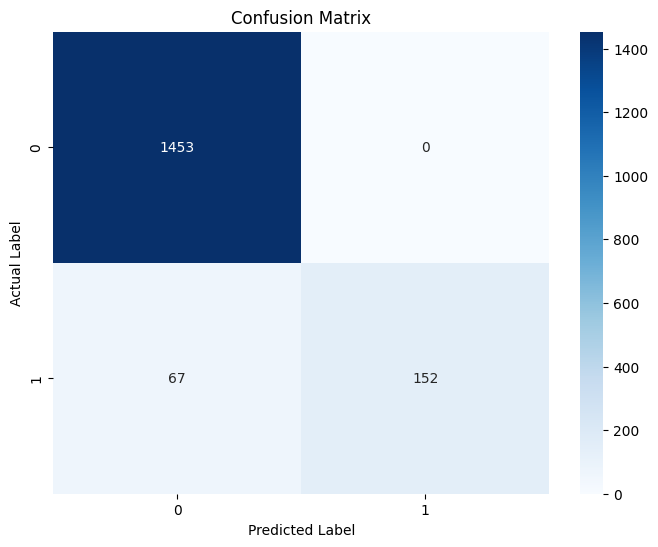

In [ ]:
from sklearn.metrics import confusion_matrix
# Plotting the confusion matrix

y_pred = model.predict(X_test_data_tv)
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()